In [120]:
import math

import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [121]:
df = pd.read_csv('data/data.csv', header=None, names=[
    'sex', 'length', 'diameter', 'height',
    'whole weight', 'shucked weight', 'viscera weight',
    'shell weight', 'rings'
])

In [122]:
df

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [123]:
number_of_snails = df['sex'].count()
sex_map = {'F': 'Female', 'I': 'Infant', 'M': 'Male'}
sex_count = df['sex'].replace(sex_map).value_counts().to_frame()
sex_count['%'] = round((sex_count['count'] / number_of_snails) * 100, 2) 

In [124]:
sex_count

,count,%
sex,,
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


In [125]:
variables = ['length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']
stats_list = []
for variable in variables:
    stats = {
        'mean': df[variable].mean(),
        'std': df[variable].std(),
        'min': df[variable].min(),
        '25%': df[variable].quantile(0.25),
        '50%': df[variable].quantile(0.5),
        '75%': df[variable].quantile(0.75),
        'max': df[variable].max(),
    }
    stats_list.append(stats)
stats_df = pd.DataFrame(stats_list, index=variables)

In [126]:
stats_df

,mean,std,min,25%,50%,75%,max
length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


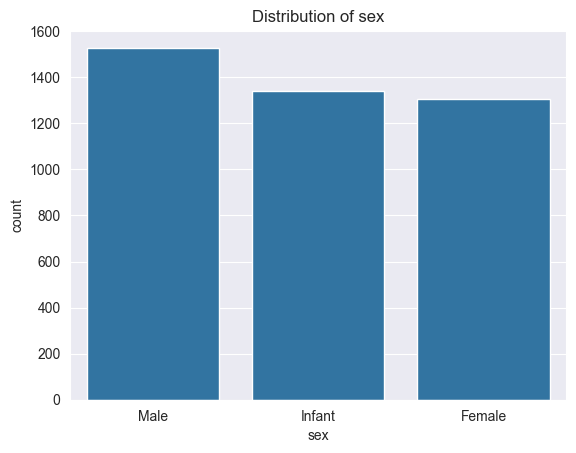

In [127]:
category_genders = df['sex'].replace(sex_map).value_counts()
sns.barplot(category_genders)
plt.title('Distribution of sex')
plt.ylabel('count')
plt.xlabel('sex')
plt.xticks(rotation=0)
plt.show()

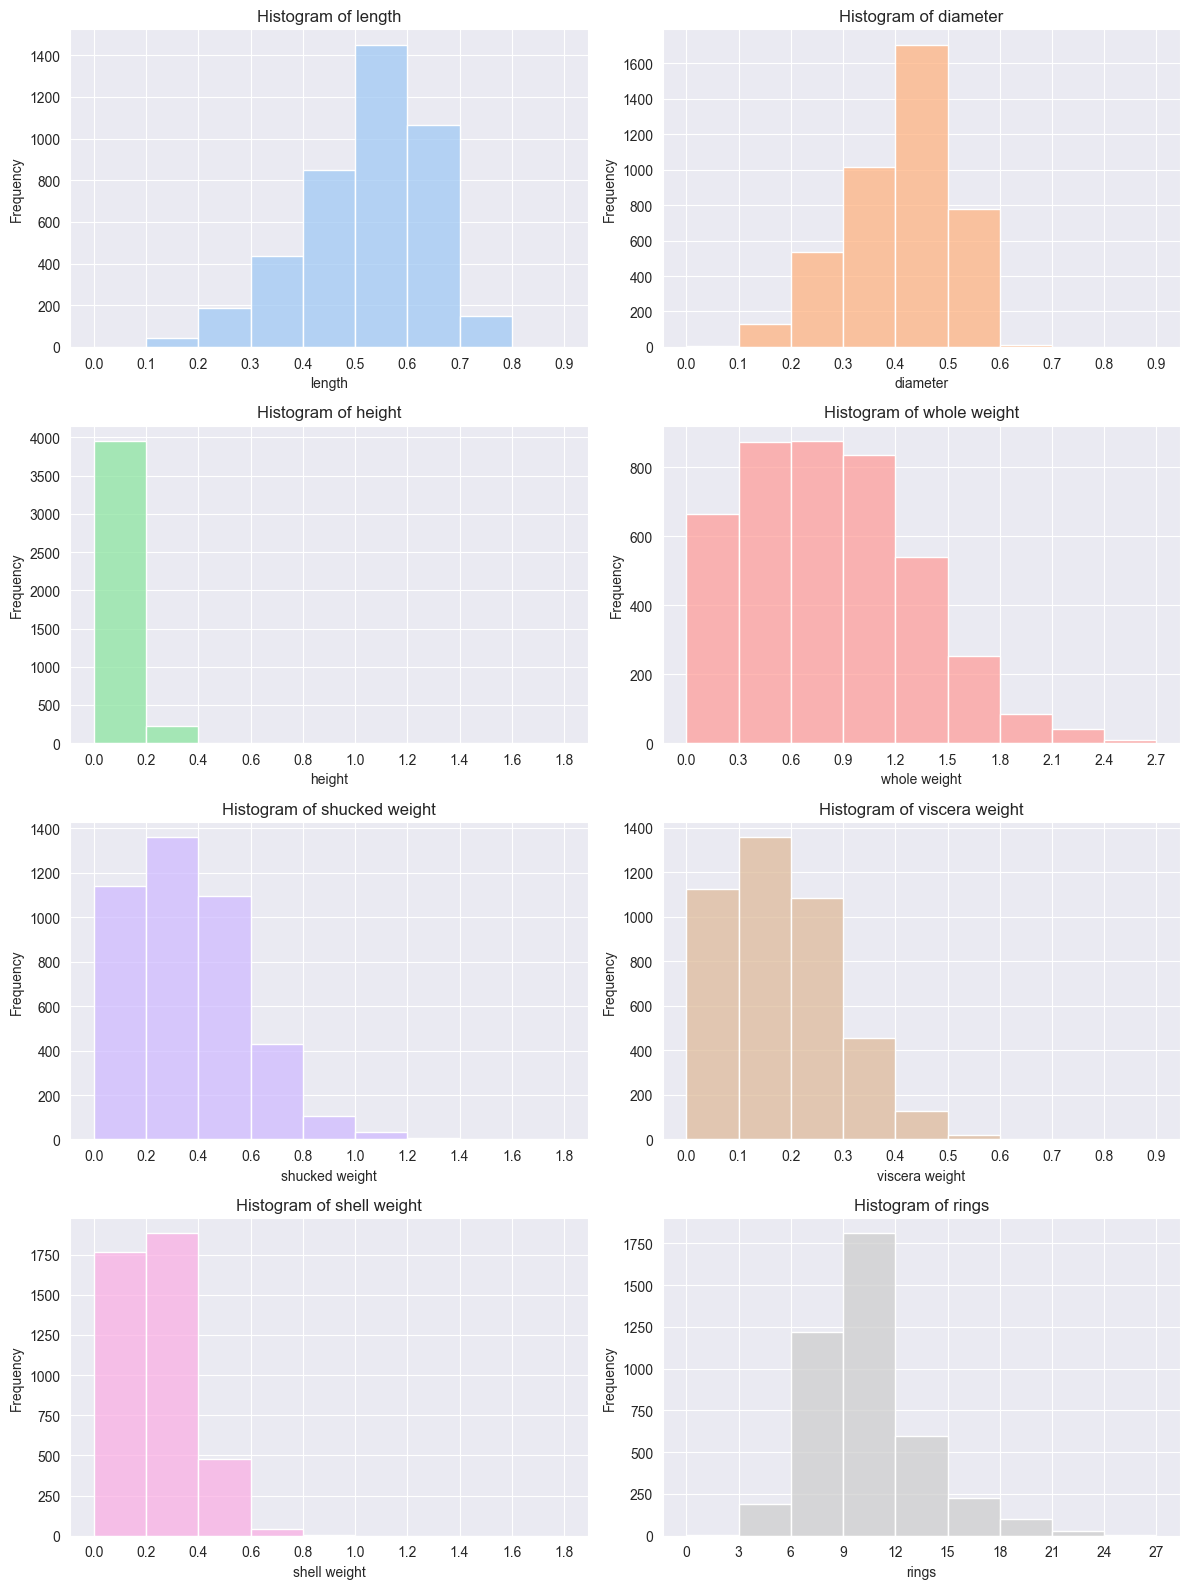

In [128]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.flatten()

for i, var in enumerate(variables):
    max_value = math.ceil(df[var].max())
    step = max_value * 0.1
    if max_value > 10:
        step = math.ceil(max_value * 0.1)
    width = np.arange(0, max_value, step)
    sns.histplot(data=df[var], ax=axs[i], bins=width, color=sns.color_palette('pastel')[i])
    axs[i].set_title(f'Histogram of {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')
    axs[i].set_xticks(width)
    
plt.tight_layout()
plt.show()

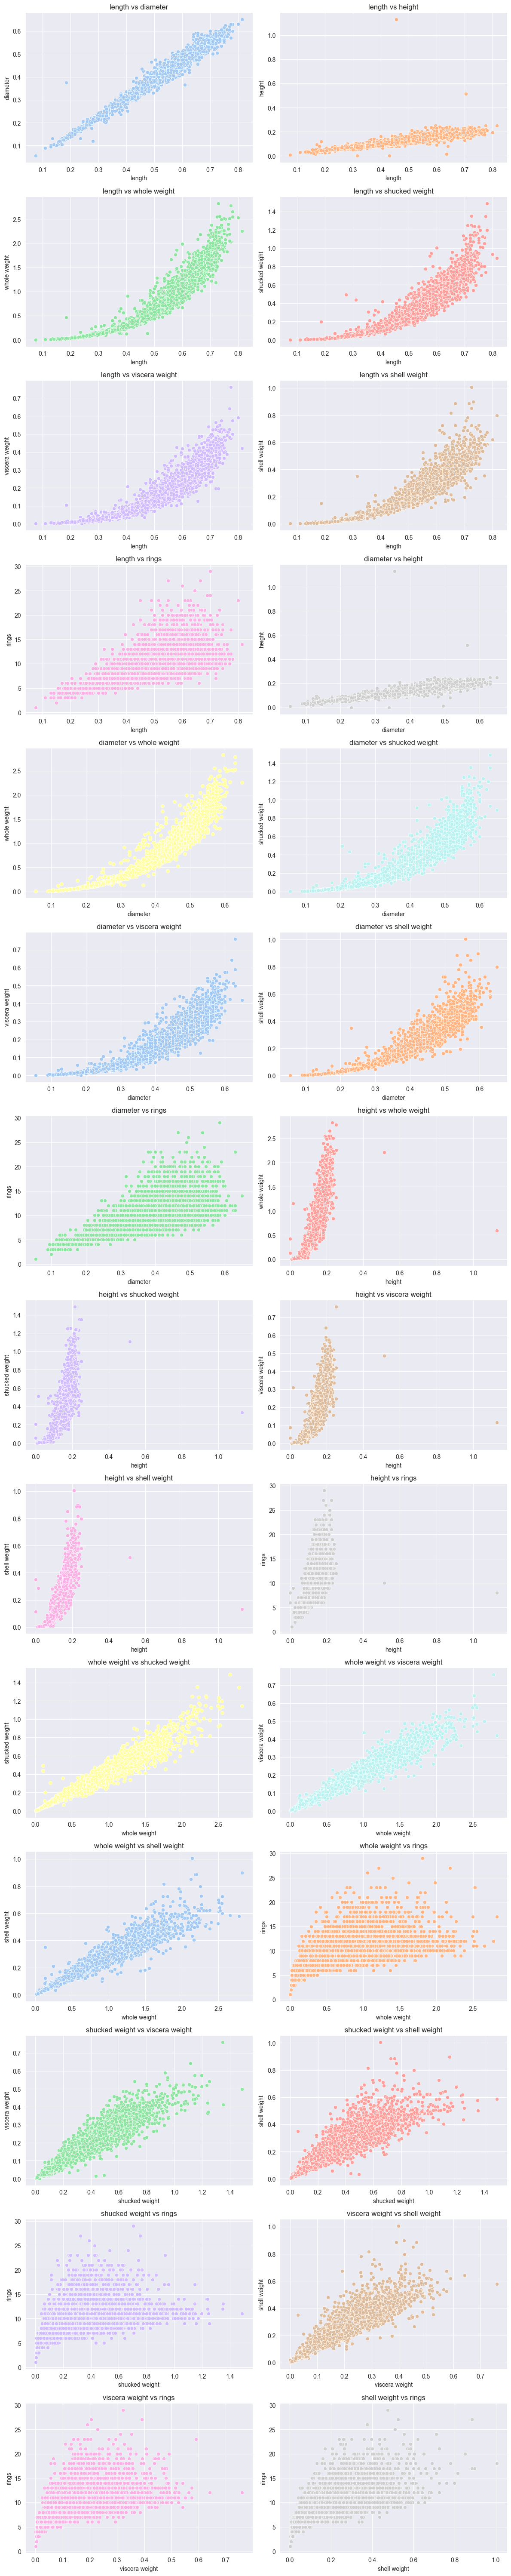

In [129]:
fig, axs = plt.subplots(nrows=14, ncols=2, figsize=(12, 60))
axs = axs.flatten()

plot_index = 0
color_cycle = itertools.cycle(sns.color_palette('pastel'))

for (var1, var2) in itertools.combinations(variables, 2):
    sns.scatterplot(data=df, x=var1, y=var2, ax=axs[plot_index], color=next(color_cycle))
    axs[plot_index].set_xlabel(var1)
    axs[plot_index].set_ylabel(var2)
    axs[plot_index].set_title(f'{var1} vs {var2}')
    plot_index += 1

plt.tight_layout()
plt.show()

In [130]:
correlation_matrix = df[variables].corr()

In [131]:
correlation_matrix

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


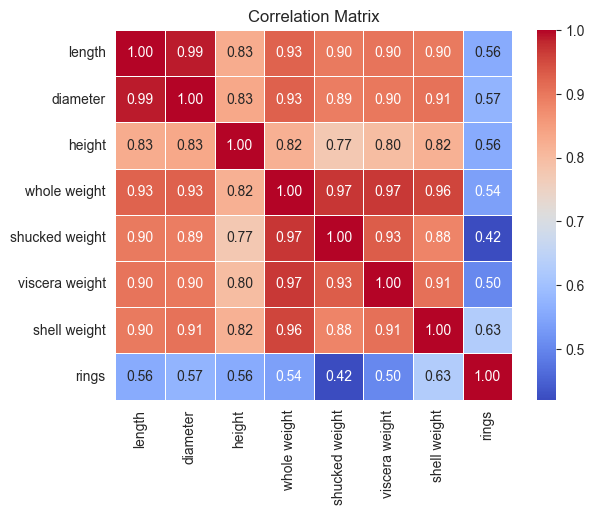

In [132]:
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

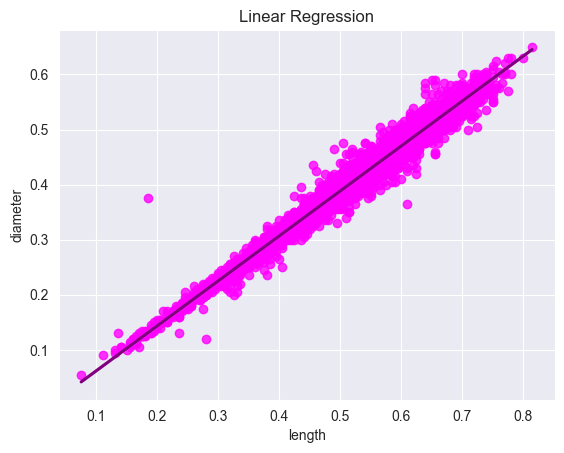

In [133]:
sns.regplot(data=df[variables] ,x='length', y='diameter', color='magenta', line_kws=dict(color="purple"))
plt.title('Linear Regression');

In [134]:
summary_list = []

for variable in variables:
    for sex in ['F', 'I', 'M']:
        group = df[df['sex'] == sex][variable]
        summary = {
            'Feature': variable,
            'Sex': sex_map[sex],
            'mean': group.mean(),
            'std': group.std(),
            'min': group.min(),
            '25%': group.quantile(0.25),
            '50%': group.median(),
            '75%': group.quantile(0.75),
            'max': group.max(),
        }
        summary_list.append(summary)

summary_df = pd.DataFrame(summary_list)
summary_df = summary_df.set_index(['Feature', 'Sex'])

In [135]:
summary_df

mean       std     min       25%       50%  \
Feature        Sex                                                       
length         Female   0.579093  0.086160  0.2750  0.525000   0.59000   
               Infant   0.427746  0.108858  0.0750  0.360000   0.43500   
               Male     0.561391  0.102697  0.1550  0.505000   0.58000   
diameter       Female   0.454732  0.070954  0.1950  0.410000   0.46500   
               Infant   0.326494  0.088109  0.0550  0.270000   0.33500   
               Male     0.439287  0.084398  0.1100  0.395000   0.45500   
height         Female   0.158011  0.039984  0.0150  0.140000   0.16000   
               Infant   0.107996  0.031995  0.0000  0.085000   0.11000   
               Male     0.151381  0.034804  0.0250  0.130000   0.15500   
whole weight   Female   1.046532  0.430316  0.0800  0.730000   1.03850   
               Infant   0.431363  0.286275  0.0020  0.205500   0.38400   
               Male     0.991459  0.470581  0.0155  0.671625   0.97575   
shucked weight Female   0.446188  0.198663  0.0310  0.295000   0.44050   
               Infant   0.191035  0.128405  0.0010  0.090000   0.16975   
               Male     0.432946  0.223000  0.0065  0.276375   0.42175   
viscera weight Female   0.230689  0.097617  0.0210  0.159000   0.22400   
               Infant   0.092010  0.062536  0.0005  0.042500   0.08050   
               Male     0.215545  0.104919  0.0030  0.145875   0.21000   
shell weight   Female   0.302010  0.125649  0.0250  0.213250   0.29500   
               Infant   0.128182  0.084927  0.0015  0.064125   0.11300   
               Male     0.281969  0.130834  0.0050  0.190000   0.27600   
rings          Female  11.129304  3.104256  5.0000  9.000000  10.00000   
               Infant   7.890462  2.511554  1.0000  6.000000   8.00000   
               Male    10.705497  3.026349  3.0000  9.000000  10.00000   

                             75%      max  
Feature        Sex                         
length         Female   0.640000   0.8150  
               Infant   0.510000   0.7250  
               Male     0.630000   0.7800  
diameter       Female   0.505000   0.6500  
               Infant   0.390000   0.5500  
               Male     0.500000   0.6300  
height         Female   0.175000   1.1300  
               Infant   0.130000   0.2200  
               Male     0.175000   0.5150  
whole weight   Female   1.320250   2.6570  
               Infant   0.599375   2.0495  
               Male     1.265625   2.8255  
shucked weight Female   0.573250   1.4880  
               Infant   0.270375   0.7735  
               Male     0.566000   1.3510  
viscera weight Female   0.297250   0.5900  
               Infant   0.130000   0.4405  
               Male     0.278000   0.7600  
shell weight   Female   0.375000   1.0050  
               Infant   0.178500   0.6550  
               Male     0.355500   0.8970  
rings          Female  12.000000  29.0000  
               Infant   9.000000  21.0000  
               Male    12.000000  27.0000